In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("F:\\excelR\\assignments\\forcasting\\Airlines+Data.csv")

In [3]:
data

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [4]:
data.shape

(96, 2)

In [6]:
data['months']=0
data['year']=0
for i in range(92):
    p=data["Month"][i]
    data['months'][i]=p[0:2]
    data['year'][i]=p[3:5]

C:\Users\dell\AppData\Local\Temp/ipykernel_19992/1131441608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['months'][i]=p[0:2]
C:\Users\dell\AppData\Local\Temp/ipykernel_19992/1131441608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'][i]=p[3:5]


In [7]:
data.head()

,Month,Passengers,months,year
0,Jan-95,112,Ja,-9
1,Feb-95,118,Fe,-9
2,Mar-95,132,Ma,-9
3,Apr-95,129,Ap,-9
4,May-95,121,Ma,-9


In [8]:
months_dummies=pd.DataFrame(pd.get_dummies(data['months']))
data=pd.concat([data,months_dummies],axis=1)
data.head()

,Month,Passengers,months,year,0,Ap,Au,De,Fe,Ja,Ju,Ma,No,Oc,Se
0,Jan-95,112,Ja,-9,0,0,0,0,0,1,0,0,0,0,0
1,Feb-95,118,Fe,-9,0,0,0,0,1,0,0,0,0,0,0
2,Mar-95,132,Ma,-9,0,0,0,0,0,0,0,1,0,0,0
3,Apr-95,129,Ap,-9,0,1,0,0,0,0,0,0,0,0,0
4,May-95,121,Ma,-9,0,0,0,0,0,0,0,1,0,0,0


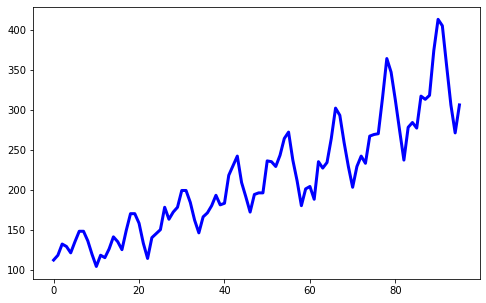

In [9]:
plt.figure(figsize=(8,5))
plt.plot(data['Passengers'],color='blue',linewidth=3)

From above lineplot of Sales values, we can state that it have Upward Linear Trend With multiplicative Seasonality

<AxesSubplot:>

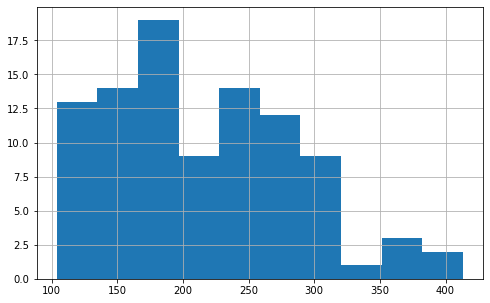

In [10]:
data['Passengers'].hist(figsize=(8,5))

<AxesSubplot:ylabel='Density'>

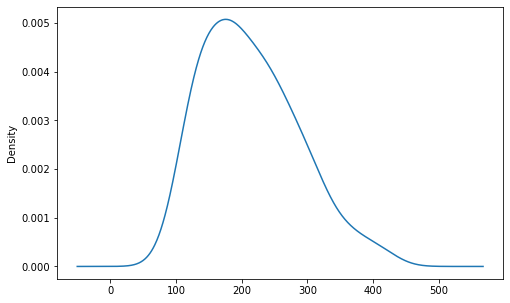

In [11]:
data['Passengers'].plot(kind='kde', figsize=(8,5))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


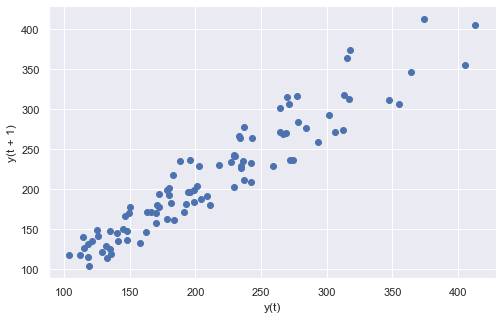

In [13]:
from pandas.plotting import lag_plot
lag_plot(data['Passengers'])
plt.show()

<AxesSubplot:xlabel='year', ylabel='Passengers'>

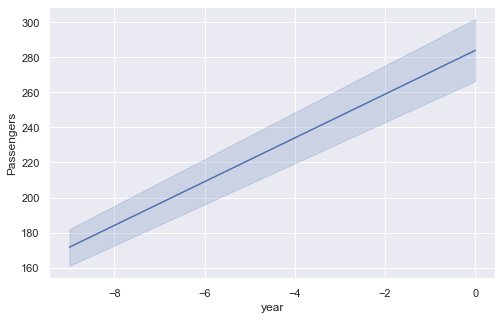

In [15]:
plt.figure(figsize=(8,5))
sns.lineplot(x='year',y='Passengers',data=data)

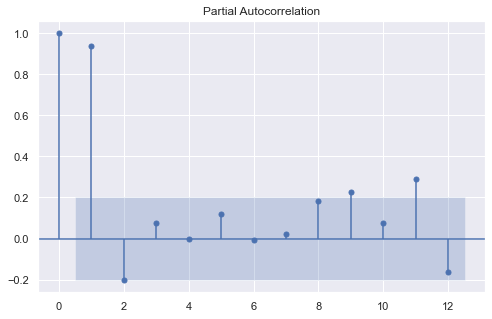

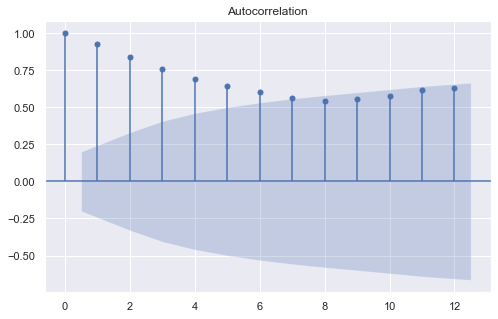

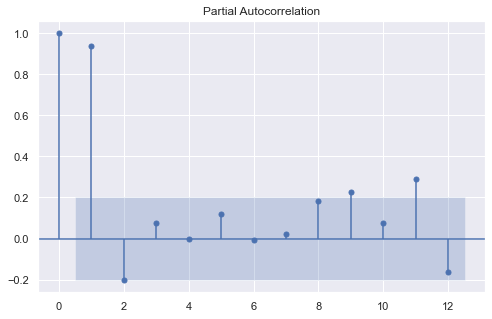

In [17]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)

## data driven forecasting methods

In [20]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### splitting data

In [21]:
Train=data.head(86)
Test=data.tail(10)

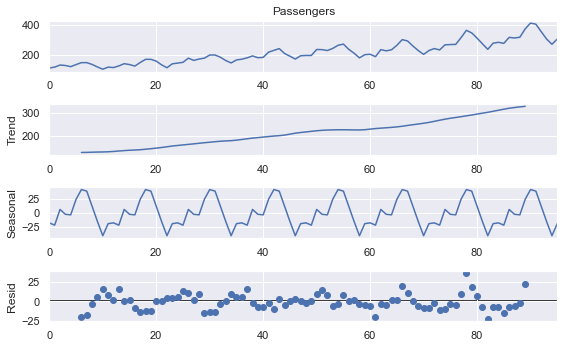

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add= seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

### evaluation metric RMSE

In [23]:
def RMSE(org,pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

### simple exponentional method

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
ses_model= SimpleExpSmoothing(Train["Passengers"]).fit()
pred_ses = ses_model.predict(start= Test.index[0],end=Test.index[-1])
rmse_ses_model= RMSE(Test.Passengers, pred_ses)
rmse_ses_model

75.27815079633753

### Holt method

In [26]:
hw_model= Holt(Train["Passengers"]).fit()
pred_hw = hw_model.predict(start= Test.index[0],end=Test.index[-1])
rmse_hw_model= RMSE(Test.Passengers, pred_hw)
rmse_hw_model

67.94517000080391

#### Holts winter exponential smoothing with additive seasonality and additive trend

In [34]:
hwe_model_add_add=ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add=hwe_model_add_add.predict(start=Test.index[0],end=Test.index[-1])
rmse_hwe_add_add_model=RMSE(Test.Passengers,pred_hwe_add_add)
rmse_hwe_add_add_model

63.464690698758474

#### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [37]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_add_model = RMSE(Test.Passengers, pred_hwe_mul_add)
rmse_hwe_mul_add_model

61.122283695290136

### model based forecasting methods 

In [39]:
data["t"]=np.arange(1,97)
data["t_squared"]=data["t"]*data["t"]
data["log_passengers"]=np.log(data["Passengers"])

data

,Month,Passengers,months,year,0,Ap,Au,De,Fe,Ja,Ju,Ma,No,Oc,Se,t,t_squared,log_passengers
0,Jan-95,112,Ja,-9,0,0,0,0,0,1,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Fe,-9,0,0,0,0,1,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Ma,-9,0,0,0,0,0,0,0,1,0,0,0,3,9,4.882802
3,Apr-95,129,Ap,-9,0,1,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,Ma,-9,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Aug-02,405,Au,0,0,0,1,0,0,0,0,0,0,0,0,92,8464,6.003887
92,Sep-02,355,0,0,1,0,0,0,0,0,0,0,0,0,0,93,8649,5.872118
93,Oct-02,306,0,0,1,0,0,0,0,0,0,0,0,0,0,94,8836,5.723585
94,Nov-02,271,0,0,1,0,0,0,0,0,0,0,0,0,0,95,9025,5.602119


In [40]:
Train=data.head(86)
Test=data.tail(10)

In [42]:
Train.head()

,Month,Passengers,months,year,0,Ap,Au,De,Fe,Ja,Ju,Ma,No,Oc,Se,t,t_squared,log_passengers
0,Jan-95,112,Ja,-9,0,0,0,0,0,1,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Fe,-9,0,0,0,0,1,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Ma,-9,0,0,0,0,0,0,0,1,0,0,0,3,9,4.882802
3,Apr-95,129,Ap,-9,0,1,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,Ma,-9,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


#### linear model

In [43]:
import statsmodels.formula.api as smf

In [44]:
linear_model=smf.ols('Passengers~t', data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Passengers'], pred_linear)
rmse_linear_model

58.643149727782514

#### exponential model

In [45]:
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp_model

49.90312334789315

#### quadratic model

In [46]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_Quad_model

53.914363578525986

#### Additive Seasonality model

In [49]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model]]
         

In [50]:
df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,75.278151
1,Holt method,67.945170
2,HW exp smoothing add,63.464691
3,HW exp smoothing mult,61.122284
4,Linear Mode,58.643150
5,Exp model,49.903123
6,Quad model,53.914364


we can see that we are getting lowest RMSE value for exponential model

## building final model with least RMSE value

In [51]:
data.head()

,Month,Passengers,months,year,0,Ap,Au,De,Fe,Ja,Ju,Ma,No,Oc,Se,t,t_squared,log_passengers
0,Jan-95,112,Ja,-9,0,0,0,0,0,1,0,0,0,0,0,1,1,4.718499
1,Feb-95,118,Fe,-9,0,0,0,0,1,0,0,0,0,0,0,2,4,4.770685
2,Mar-95,132,Ma,-9,0,0,0,0,0,0,0,1,0,0,0,3,9,4.882802
3,Apr-95,129,Ap,-9,0,1,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,May-95,121,Ma,-9,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [52]:
final_model = smf.ols('log_passengers~t',data=data).fit()
pred_final = pd.Series(final_model.predict(data[['t']]))
rmse_final_model = RMSE(data['Passengers'], pred_final)
rmse_final_model

220.24670093606062

In [53]:
pred_df=pd.DataFrame({'Actual':data.Passengers,'predicted':pred_final})

In [54]:
pred_df

,Actual,predicted
0,112,4.779620
1,118,4.790772
2,132,4.801923
3,129,4.813075
4,121,4.824226
...,...,...
91,405,5.794417
92,355,5.805569
93,306,5.816720
94,271,5.827872
